In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import pickle

In [3]:
mass = pd.read_csv('../data/mass_mobile.csv')
#mass = pd.read_pickle('../data/02b_added_prosperity.pickle')

#mass = pd.read_pickle('../data/03_dummy_df.pickle')

# infile = open('../data/03_dummy_df.pickle','r')
# mass = pickle.load(infile)
# infile.close()

mass.head(3)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,removal_of_politician,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,...,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003


In [7]:
mass.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
mass.shape

(15179, 233)

In [39]:
mass.groupby(['accomodation','arrests']).count()

id  country  ccode  region  protestnumber  \
accomodation arrests                                                 
0            0        11660    11660  11660   11660          11660   
             1         1998     1998   1998    1998           1998   
1            0         1376     1376   1376    1376           1376   
             1          145      145    145     145            145   

                      protesterviolence  location  protesteridentity  sources  \
accomodation arrests                                                            
0            0                    11660     11642              11660    11656   
             1                     1998      1997               1998     1998   
1            0                     1376      1374               1376     1376   
             1                      145       145                145      145   

                      notes  ...  removal_of_politician  social_restrictions  \
accomodation arrests         ...                                               
0            0        11660  ...                  11660                11660   
             1         1998  ...                   1998                 1998   
1            0         1376  ...                   1376                 1376   
             1          145  ...                    145                  145   

                      start_date  end_date  target  notes_clean    neg    neu  \
accomodation arrests                                                            
0            0             11660     11660   11660        11660  11660  11660   
             1              1998      1998    1998         1998   1998   1998   
1            0              1376      1376    1376         1376   1376   1376   
             1               145       145     145          145    145    145   

                        pos  compound  
accomodation arrests                   
0            0        11660     11660  
             1         1998      1998  
1            0         1376      1376  
             1          145       145  

[4 rows x 231 columns]

In [34]:
mass.arrests.value_counts()

0    13036
1     2143
Name: arrests, dtype: int64

In [43]:
protest_cats = pd.DataFrame(mass.protest_size_category.value_counts())
protest_cats

,protest_size_category
100-999,4745
"1,000-4,999",3897
50-99,3492
"10,000-100,000",2121
"5,000-9,999",576
"Over 100,000",369
Less than 50,25


In [68]:


ordered_categories = ['Less than 50', '50-99', '100-999', '1,000-4,999',  '5,000-9,999', '10,000-100,000', 'Over 100,000', ]

protest_cats = pd.DataFrame(mass.protest_size_category.value_counts())
protest_cats = protest_cats.reindex(ordered_categories)

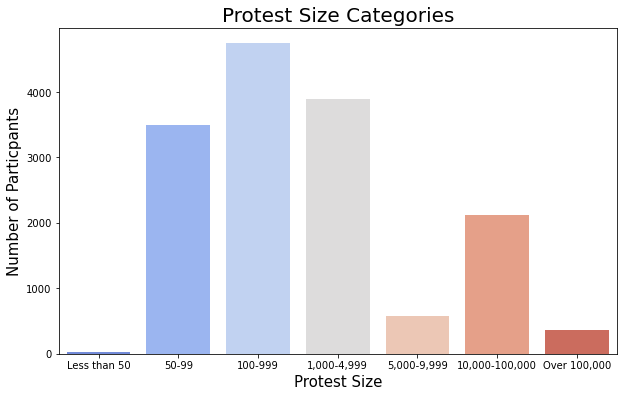

In [69]:
ordered_categories = ['Less than 50', '50-99', '100-999', '1,000-4,999',  '5,000-9,999', '10,000-100,000', 'Over 100,000', ]

protest_cats = pd.DataFrame(mass.protest_size_category.value_counts())
protest_cats = protest_cats.reindex(ordered_categories)

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)


ax = sns.barplot(x=protest_cats.index, y = 'protest_size_category' , data=protest_cats, ax=ax, palette='coolwarm')

ax.set_title("Protest Size Categories",fontsize=20)
ax.set_xlabel("Protest Size",fontsize=15)
ax.set_ylabel("Number of Particpants",fontsize=15)
ax.tick_params(labelsize=10)



In [773]:
mass['participants'].isnull().sum()

12

In [40]:
mass.columns[0:20]

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes', 'protester_id_type', 'partipants_number',
       'protest_size_category', 'pop_male', 'pop_female', 'pop_total',
       'pop_density', 'prosperity_2020', 'country_Afghanistan',
       'country_Albania'],
      dtype='object')

In [41]:
mass.columns[185:234]

Index(['region_Central America', 'region_Europe', 'region_MENA',
       'region_North America', 'region_Oceania', 'region_South America',
       'protest_size_category_1,000-4,999',
       'protest_size_category_10,000-100,000', 'protest_size_category_100-999',
       'protest_size_category_5,000-9,999', 'protest_size_category_50-99',
       'protest_size_category_Less than 50',
       'protest_size_category_Over 100,000',
       'protester_id_type_civil_human_rights',
       'protester_id_type_ethnic_group', 'protester_id_type_locals_residents',
       'protester_id_type_pensioners_retirees',
       'protester_id_type_political_group', 'protester_id_type_prisoners',
       'protester_id_type_protestors_generic',
       'protester_id_type_religious_group',
       'protester_id_type_soldiers_veterans',
       'protester_id_type_students_youth',
       'protester_id_type_victims_families', 'protester_id_type_women',
       'protester_id_type_workers_unions', 'arrests', 'accomodation',
  

In [ ]:
def string_to_number(string):

    # if nan then just exit
    if string is np.nan:
        return string
    
    output = re.findall (  r'\d+(?:,\d+)?' , string)
        
    if len(output ) == 0:
        return string
    elif len(output) == 1:
        return output[0]
    elif len(output) > 1:
        return max(output)
    else:
        return output

In [776]:

#Used to convert participants column from a mess of text into nice clean numbers
# Return value is still a string value, but can be converted easily later

def participants_to_numbers(string):

    # if nan then just exit
    if string is np.nan:
        return string
    
    if type(string) is list:
        return string
    
    string = string.lower()
    
    small_groups = ['dozen','dozens', 'a group', 'group','several dozen','scores','people','crowd','crowds']   # 50 -99
    medium_groups = ['busloads','hundreds','widespread','several hundred','large','hundred','protests','demonstrators','teachers','.']  #100 - 999
    large_groups = ['thousand','thousands','several thousand', 'mass', 'huge'] #1000-5000
    very_large_groups = ['tens of thousands']  #5000-10_000
    huge_groups =  ['government']        #10_000 - 100_000
    massive_groups = ['hundreds of thousands','millions','million','venezuela']    # >  100_000
    
    word_list = string.split(' ')
    
    word_list.reverse()   # to handle cases like hundreds of thousands
    
    for word in word_list:
        
        word = word.replace('\"','')
        
        if word in small_groups:
            return 50
        elif word in medium_groups:
            return 200
        elif word in large_groups:
            return 1500
        elif word in very_large_groups:
            return 20_000
        elif word in huge_groups:
            return 50_000
        elif word in massive_groups:
            return 600_000
    
    return string

In [777]:
def participants_to_categories(string):

    # if nan then just exit
    if string is np.nan:
        return string
    
    if type(string) is list:
        return string
    
    string = string.lower()
    
    small_groups = ['dozen','dozens', 'a group', 'group','several dozen','scores','people','crowd','crowds']   # 50 -99
    medium_groups = ['busloads','hundreds','widespread','several hundred','large','hundred','protests','demonstrators','teachers','.']  #100 - 999
    large_groups = ['thousand','thousands','several thousand', 'mass', 'huge'] #1000-5000
    very_large_groups = ['tens of thousands']  #5000-10_000
    huge_groups =  ['government']        #10_000 - 100_000
    massive_groups = ['hundreds of thousands','millions','million','venezuela']    # >  100_000
    
    word_list = string.split(' ')
    
    word_list.reverse()   # to handle cases like hundreds of thousands
    
    for word in word_list:
        
        word = word.replace('\"','')
        
        if word in small_groups:
            return '50-99'
        elif word in medium_groups:
            return '100-999'
        elif word in large_groups:
            return '1000-5000'
        elif word in very_large_groups:
            return '5000-10,000'
        elif word in huge_groups:
            return '10,000-100,000'
        elif word in massive_groups:
            return 'Over 100,000'
    
    return string

In [778]:

#mass['participants_converted'] = mass['participants']
mass['participants_converted'] = mass['participants'].apply(string_to_number)
mass['participants_converted'] = mass['participants_converted'].apply(participants_to_numbers)


mass['participants_cat_converted'] = mass['participants'].apply(string_to_number)
mass['participants_cat_converted'] = mass['participants_cat_converted'].apply(participants_to_categories)



In [779]:
mass['participants_category'].isnull().sum()

5352

In [780]:
#mass = mass[mass['participants_category'].notnull()]
mass = mass[mass['participants'].notnull()]

In [781]:
mass['participants'].isnull().sum()

0

In [782]:
mass.shape

(15227, 33)

In [783]:
mass['participants_category'].isnull().sum()

5345

In [784]:
mass['participants_converted'] = mass['participants_converted'].replace(',','', regex=True)

In [785]:
mass['participants_bad'] = [word if str(word).isnumeric() == np.nan or str(word).isnumeric() == False else '' for word in mass['participants_converted']]

In [786]:
print (f'There are {mass[mass["participants_bad"]!=""].shape[0] } bad rows in Mass dataframe.')

There are 0 bad rows in Mass dataframe.


In [787]:
mass[mass['participants_bad']!='']   [['country','year','protestnumber','participants_category','participants','participants_converted','protesterdemand1','stateresponse1']].iloc[0:50]

,country,year,protestnumber,participants_category,participants,participants_converted,protesterdemand1,stateresponse1


In [788]:
mass['participants_converted']= mass['participants_converted'].astype('int64') 

In [789]:
#mass.info()

In [790]:
mass[mass['participants_converted'] > 0]   [['country','year','participants_category','participants','participants_converted','participants_cat_converted','protesterdemand1','stateresponse1']].iloc[0:50]

,country,year,participants_category,participants,participants_converted,participants_cat_converted,protesterdemand1,stateresponse1
0,Canada,1990,NaN,1000s,1000,1000,"political behavior, process",ignore
1,Canada,1990,NaN,1000,1000,1000,"political behavior, process",ignore
2,Canada,1990,NaN,500,500,500,"political behavior, process",ignore
3,Canada,1990,NaN,100s,100,100,land farm issue,accomodation
4,Canada,1990,NaN,950,950,950,"political behavior, process",crowd dispersal
5,Canada,1990,NaN,200,200,200,police brutality,crowd dispersal
6,Canada,1991,NaN,110000,110000,110000,labor wage dispute,ignore
7,Canada,1991,NaN,110000,110000,110000,labor wage dispute,ignore
8,Canada,1992,NaN,1000,1000,1000,police brutality,arrests
9,Canada,1993,NaN,10000s,10000,10000,"political behavior, process",ignore


In [ ]:
mass.info